### T-student w/ Drift Time-series Generation

In [2]:
import tensorflow
from tensorflow import keras
import random as rn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Générer M séries temporelles de longeur T xi,t selon une loi de Student avec
# df = 4, de variance 1 et de moyenne moyenne µk pour 100 valeurs de µk entre
# −2 et +2 (100×M séries temporelles de longueur T en tout).

In [4]:
M = 100
T = 10000
df = 4
mu = np.linspace(-2, 2, 100) # 100 valeurs de mu entre -2 et 2
xi = np.zeros((M, T, len(mu))) # M séries temporelles de longueur T pour chaque mu ; e.g xi[i, :, j] correspond à la ième série temporelle de longueur T avec la jème moyenne mu[j]
for i in range(M):
    for j in range(len(mu)):
        xi[i, :, j] = np.random.standard_t(df, T) + mu[j]

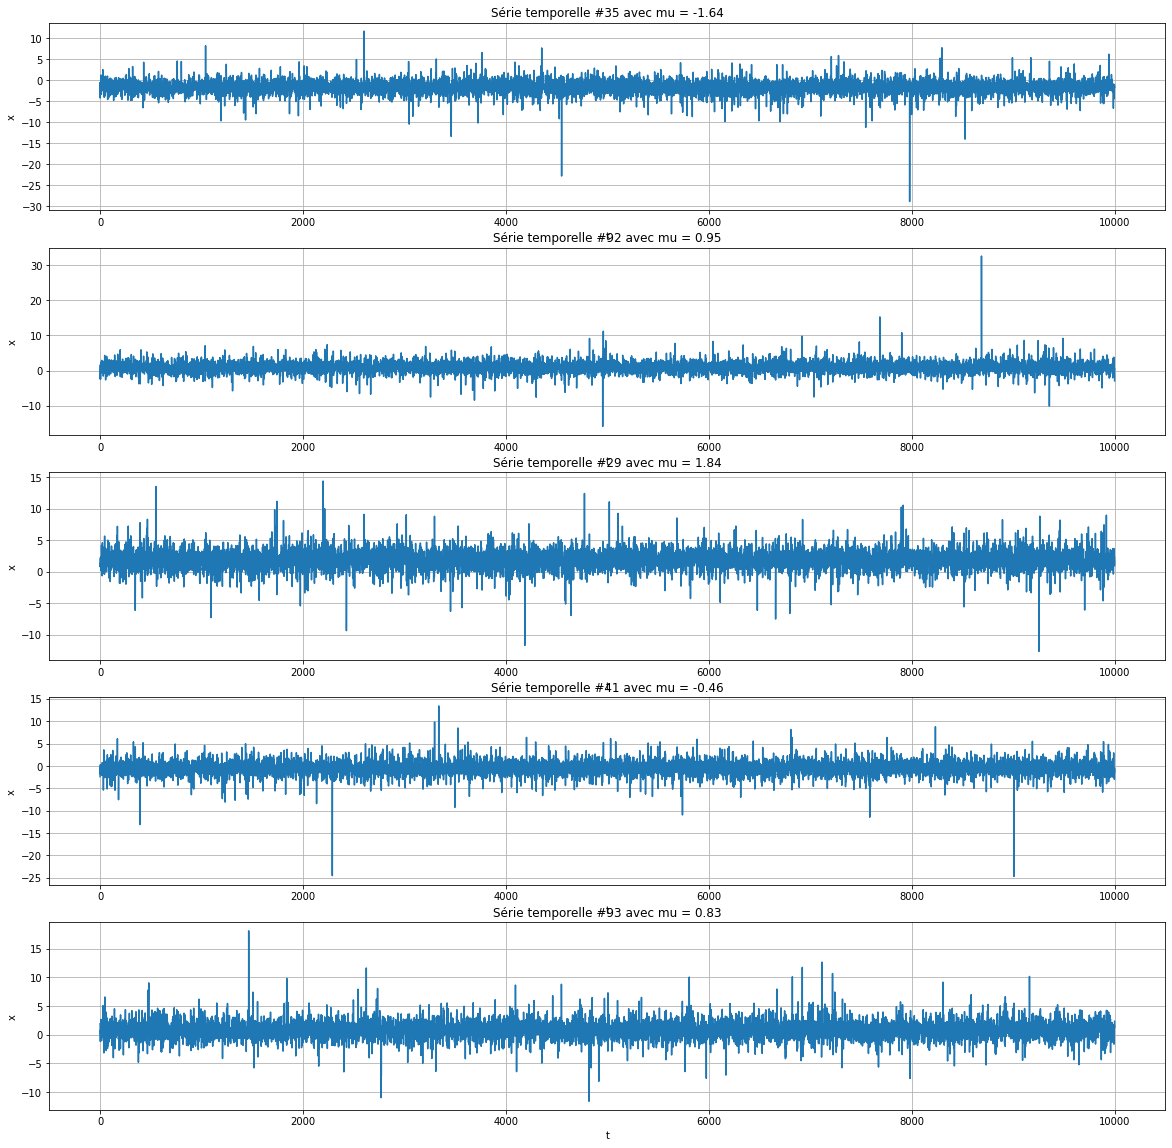

In [5]:
fig = plt.figure(figsize=(20, 20))
# extract 5 random series with 5 random means
idx = np.random.randint(0, M, 5)
idx_mu = np.random.randint(0, len(mu), 5)

for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.plot(xi[idx[i], :, idx_mu[i]])
    plt.title("Série temporelle #{} avec mu = {}".format(idx[i], np.round(mu[idx_mu[i]], 2)))
    plt.xlabel("t")
    plt.ylabel("x")
    plt.grid(True)
plt.show()

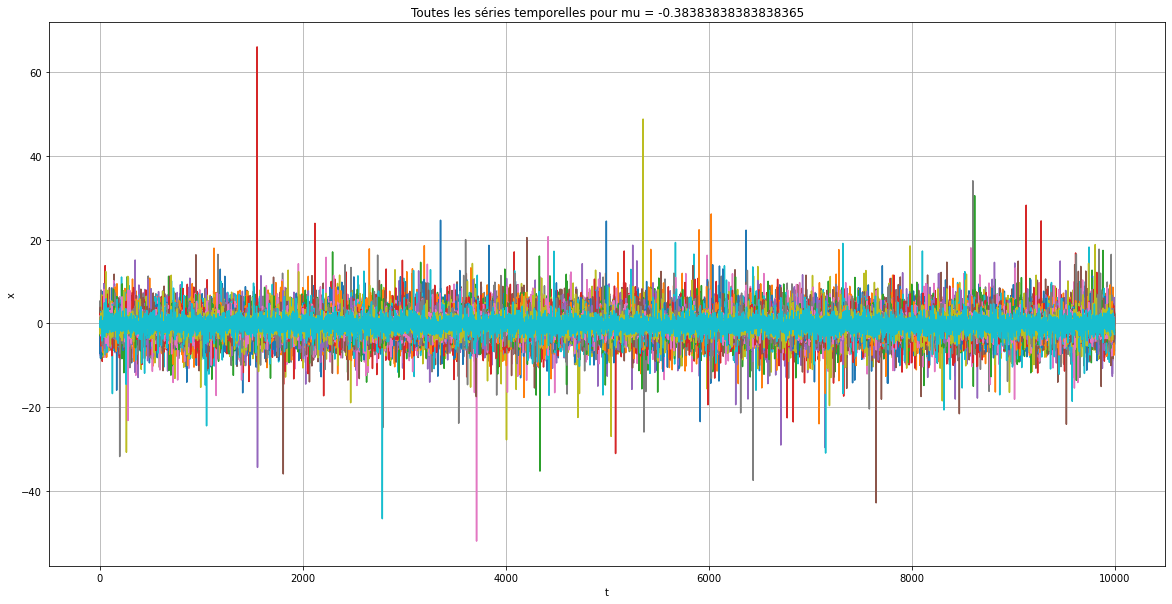

In [6]:
# Plot toutes les séries temporelles pour un même mu superposées
mu_chosen = 40
fig = plt.figure(figsize=(20, 10))
for i in range(M):
    plt.plot(xi[i, :, mu_chosen])

plt.title("Toutes les séries temporelles pour mu = {}".format(mu[mu_chosen]))
plt.xlabel("t")
plt.ylabel("x")
plt.grid(True)
plt.show()

# Model parameters to estimate mu:

Pour chaque mu (100 mu différents) on a M*100 simulations disponibles.
- X : les M*100 simulations pour ce mu donné
- Y : la valeur du mu

In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Dense(12, input_shape=(T,), activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                120012    
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 120,025
Trainable params: 120,025
Non-trainable params: 0
_________________________________________________________________
None


# Setting up training dataset

In [9]:
# Train for all possible values of mu
xi_train = xi.reshape(M * len(mu), T)
yi_train = np.zeros((M * len(mu), 1))

In [10]:
print(xi_train.shape)
print(yi_train.shape)

(10000, 10000)
(10000, 1)


In [11]:
print(xi_train.shape, yi_train.shape)
print(M * len(mu))
assert xi_train.shape[0] == M * len(mu)

# Super ! on a la dim& correcte pour le training set

(10000, 10000) (10000, 1)
10000


# Start training

In [35]:
model.fit(xi_train, yi_train, epochs=50, batch_size=32, verbose=True)

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 10/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 11/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 12/50
313/313 [==============================] - 1s 2ms/s

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                120012    
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 120,025
Trainable params: 120,025
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Prediction test on a new series:

In [15]:
mu_new = 1.8
xi_test = np.random.standard_t(df, T) + mu_new
xi_test = xi_test.reshape(1, T)

In [16]:
xi_test.shape

(1, 10000)

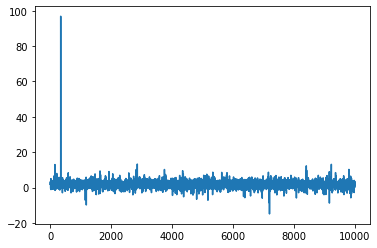

In [17]:
plt.plot(xi_test[0])

In [18]:
xi_test.shape
# coherent avec la dimension 1xT (1 série temporelle de longueur T)

(1, 10000)

In [20]:
yi_test = model.predict(xi_test)
print("Prediction: {}".format(yi_test[0][0]))
print("True value: {}".format(mu_new))

Prediction: -1.8183300495147705
True value: 1.8


# Model Evaluation

- Mu = 1.8

In [28]:
# Testing on a big set of timeseries (100000) and mean squared error
N = 10000
xi_test = np.zeros((N, T))
yi_test = np.zeros((N, 1))

mu_test = 1.8
for i in range(N):
    xi_test[i, :] = np.random.standard_t(df, T) + mu_test
    yi_test[i, :] = mu_test
    
assert xi_test.shape[0] == yi_test.shape[0]

mse = model.evaluate(xi_test, yi_test, verbose=True)
print(mse)

313/313 [==============================] - 0s 923us/step - loss: 3.3778
3.3777973651885986


In [29]:
def eval_(N, mu_test):
    N = 10000
    xi_test = np.zeros((N, T))
    yi_test = np.zeros((N, 1))

    for i in range(N):
        xi_test[i, :] = np.random.standard_t(df, T) + mu_test
        yi_test[i, :] = mu_test
        
    assert xi_test.shape[0] == yi_test.shape[0]

    mse = model.evaluate(xi_test, yi_test, verbose=True)
    return mse    

In [ ]:
mu_test = np.linspace(-10, 10, 20)
mse = []
for i in range(len(mu_test)):
    mse.append(eval_(N, mu_test[i]))

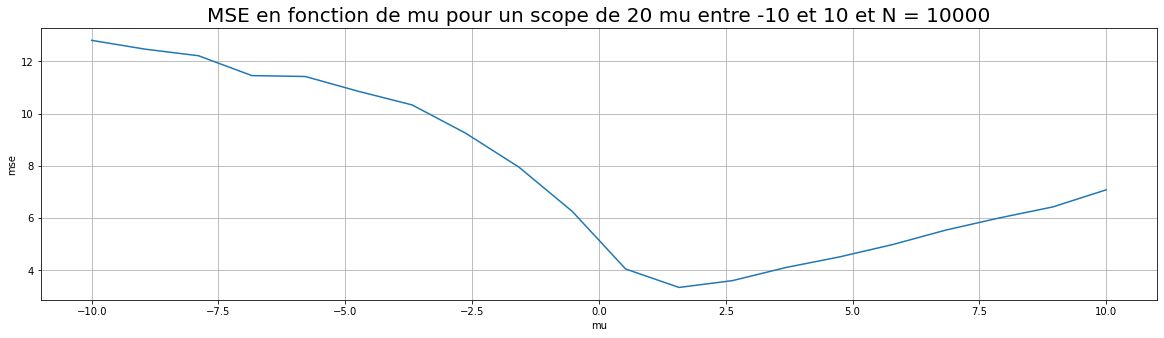

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(mu_test, mse)
plt.xlabel("mu")
plt.ylabel("mse")
plt.title("MSE en fonction de mu pour un scope de 20 mu entre -10 et 10 et N = 10000", fontsize=20)
plt.grid(True)
plt.show()

# Areas of Improvement:

- Travailler l'architecture et la fonction d'activation
- Travailler les paramètres (batch_size), rajouter des couches ? 
- Donner les quantiles car meilleure type de représentation (plutôt que de la série temp de longueur T...) ; en effet, on rq la loi de Student est plutôt caractérisée par ses tails...

In [5]:
from data import t_student_drift
from features import build_features
from models import predict_model, train_model
from visualization import plot

In [38]:
# reload libraries
import importlib
importlib.reload(t_student_drift)
importlib.reload(build_features)
importlib.reload(predict_model)
importlib.reload(train_model)
importlib.reload(plot)

<module 'visualization.plot' from 'c:\\Users\\cleme\\DL-finance\\visualization\\plot.py'>

In [16]:
xi, mu = t_student_drift.generate_timeseries()

In [17]:
X_train, X_test, y_train, y_test = build_features.prepare_train(xi, mu) 

In [25]:
model = train_model.create_model()

INFO:models.train_model:None


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                120012    
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 120,025
Trainable params: 120,025
Non-trainable params: 0
_________________________________________________________________


In [26]:
train_model.train_model(model, X_train, y_train, X_test, y_test)

INFO:models.train_model:Training model...


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1198 - val_loss: 8.9872e-06
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4.0823e-06 - val_loss: 1.1373e-06
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 3.9525e-07 - val_loss: 6.1983e-08
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1.7227e-08 - val_loss: 1.4452e-09
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 3.2860e-10 - val_loss: 1.3534e-11
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 2.5515e-12 - val_loss: 4.5860e-14
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 7.2287e-15 - val_loss: 4.8566e-17
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 6.4281e-18 - val_loss: 1.3163e-20
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1.4639e-21 - val_loss: 6.9279e-25
Epoch 10/50
250/250 [===========

INFO:models.train_model:Done.


In [36]:
predict_model.predict_mu(model)

INFO:models.predict_model:Prediction: -0.7124680876731873
INFO:models.predict_model:True value: 1.8


(1.8, -0.7124681)

In [ ]:
predict_model.generalization_evaluation(model)